# Assignment 4
## [Machine Learning 2018-1](https://fagonzalezo.github.io/ml-2018-1/)
**Submission:** May 9th

Juan Navarro, <jsnavarroa@unal.edu.co>

-------------------------------


In [1]:
import numpy as np
import pylab as pl

import matplotlib.pyplot as plt
import os
import pandas as pd

from keras.utils.data_utils import get_file

from IPython import display

%matplotlib inline

/home/juan/Programas/Miniconda3/envs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 1. (2.0)
Consider the following neural network:

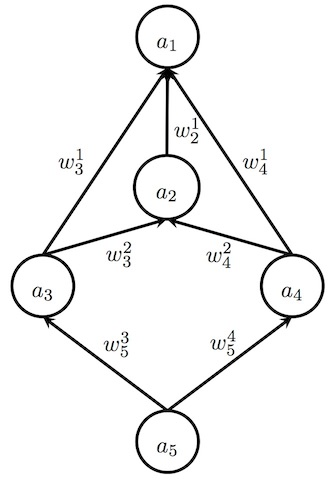

In [2]:
display.display(display.Image(filename='./nn.jpg'))

where $a_{i}=\sum_{j}w_{j}^{i}z_{j}$ , $z_{i}=f_{i}(a_{i})$ for
$i=1,2,3,4$, $z_{5}=a_{5}$ (an input neuron), $f_{2}(x)=\textrm{relu}(x)$,
and $f_{1}(x)=f_{3}(x)=f_{4}(x)=\textrm{sigmoid}(x)$. $\textrm{relu}(x)$
corresponds to a rectifier linear unit transfer function defined as:
$$
\textrm{relu}(x)=\begin{cases}
x & \textrm{if }x\ge0\\
0 & \textrm{otherwise}
\end{cases}
$$

1.a Write a function to simulate the neural network:

In [3]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

vSigmoid = np.vectorize(sigmoid)

def relu(x):
    return max(0, x)

def forward_propagate(x, w):
    '''
    x: input value for neuron 5
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
    Returns: a pair of arrays (a, z), where 
             a has the activation values for each neuron, and
             z the output values for each neuron
    '''
    z = np.zeros(5)
    a = np.zeros(5)
    # your code here
    
    w13, w12, w14, w32, w42, w53, w54 = w
    a1, a2, a3, a4, a5 = a
    z1, z2, z3, z4, z5 = z
    
    a5 = x
    z5 = a5
    
    a[2:4] = np.dot(z5, w[5:7])
    z[2:4] = vSigmoid(a[2:4])
    a3, a4 = a[2:4]
    z3, z4 = z[2:4]
    
    
    a2 = w32*z3 + w42*z4
    z2 = relu(a2)
    
    a1 = w12*z2 + w13*z3 + w14*z4
    z1 = sigmoid(a1) 
    
    a = np.array([a1, a2, a3, a4, a5])
    z = np.array([z1, z2, z3, z4, z5])
    
    return (a, z)

x = 1
w = [1, 2, 1, 0, 3, 1, 2]
a, z = forward_propagate(x, w)

test_a = np.array([6.89663812, 2.64239123, 1.        , 2.        , 1.        ])
test_z = np.array([0.99898984, 2.64239123, 0.73105858, 0.88079708, 1.        ])
    
print("Test a:", np.isclose(test_a, a))
print("Test z:", np.isclose(test_z, z))

Test a: [ True  True  True  True  True]
Test z: [ True  True  True  True  True]


1.b Deduce the equations to calculate $\delta_{i}$ (the error value per
neuron) for all the neurons. Write a function that given a training
sample and the weights of the network calculate $\delta_{i}$ for
each neuron. Assume a square error loss:

$$ L_2(f, D) =\sum_{(x_{i},r_{i})\in D} (r_i - f(x_i))^2 $$

In [9]:
def square_error(y_true, y_pred):
    return (y_true - y_pred)**2

def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

def relu_derivative(x):
    if(x > 0):
        return 1
    else:
        return 0

def bp(x, y, w):
    '''
    x: input value for neuron 5
    y: output value for neuron 1
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
    Returns: an array delta with the delta values for each
             neuron
    '''
    delta = np.zeros(5)
    ##
    a, z = forward_propagate(x, w)
    
    a1, a2, a3, a4, a5 = a
    z1, z2, z3, z4, z5 = z
    w13, w12, w14, w32, w42, w53, w54 = w
    d1, d2, d3, d4, d5 = delta
        
    d1 = sigmoid_derivative(a1) * (z1 - y)
    
    d2 = relu_derivative(a2) * (d1*w12)
    
    d3 = sigmoid_derivative(a3) * (d1*w13 + d2*w32)
    
    d4 = sigmoid_derivative(a4) * (d1*w14 + d2*w42)
    
    d5 = (d3*w53 + d4*w54)
    
    delta = np.array([d1, d2, d3, d4, d5])
    
    ##
    return delta


x=-3.0 
y=0.731204118803
w = [1, 2, 1, 0, 3, 1, 2]
bp(x, y, w)

array([-0.05370027, -0.10740055, -0.002426  , -0.00092717, -0.00428033])

1.c Write a function to update the neural network weights when a new training sample is shown using stochastic gradient descent.

In [10]:
def train_step(x, y, w, eta):
    '''
    x: input value for neuron 5
    y: output value for neuron 1
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
    eta: learning rate
    Returns: updated w array
    '''
    # Calculate dw
    dw = np.zeros(7)
    
    # Your code here
    a, z = forward_propagate(x, w)
    
    delta = bp(x, y, w)
    
    z1, z2, z3, z4, z5 = z
    dw13, dw12, dw14, dw32, dw42, dw53, dw54 = dw
    d1, d2, d3, d4, d5 = delta
    
    dw13 = d1 * z3
    dw12 = d1 * z2
    dw14 = d1 * z4
    dw32 = d3 * z2
    dw42 = d4 * z2
    dw53 = d5 * z3
    dw54 = d5 * z4
    
    dw = np.array([dw13, dw12, dw14, dw32, dw42, dw53, dw54])
    
    ####  ####
    w = w - eta*dw
    return w

x=-3.0 
y=0.731204118803
w = [1, 2, 1, 0, 3, 1, 2]
eta = 0.1
train_step(x, y, w, eta)

array([1.00025468e+00, 2.00003983e+00, 1.00001328e+00, 1.79957442e-06,
       3.00000069e+00, 1.00002030e+00, 2.00000106e+00])

1.d Use the previous function to train the network with these [training samples](http://fagonzalezo.github.io/ml/samples_assign4.txt).  Plot the evolution of the error and the predictions of the trained network. Write down the weights of the trained network.

(eta=0.1)  w = [-1.12672727  4.50715151  2.44187168  0.98658497 -3.43981372 -3.5831754
 -4.55855955]


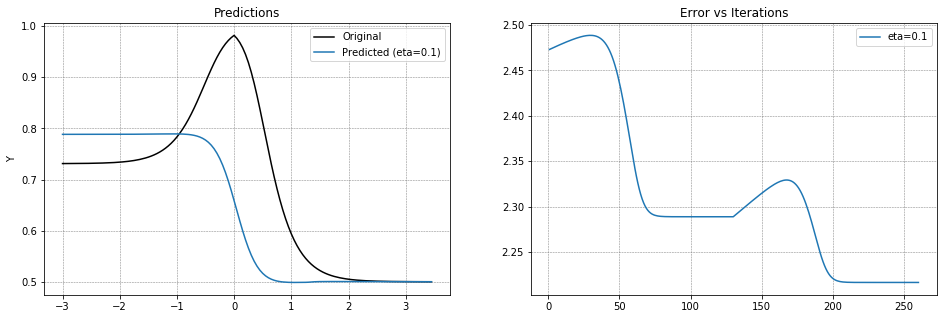

In [35]:
from sklearn.metrics import mean_squared_error

# Get the data set
path = get_file(os.path.abspath("./samples_assign4.txt"), 
                origin="http://fagonzalezo.github.io/ml/samples_assign4.txt" )

data = pd.read_csv(path, sep=" ", header=None)

X = data.values[:, 0]
Y = data.values[:, 1]

# Classification function
def predict(X, w):
    Y_pred = []
    for x in X:
        a, z = forward_propagate(x, w)
        Y_pred.append(z[0])
    return Y_pred

# Error function
def evalOnDataSet(X, Y, w):
    Y_pred = predict(X, w)
    return mean_squared_error(Y, Y_pred) * len(Y)

def experiment(X, Y, w, eta=0.01, epochs=2):
    error = []
    for epoch in range(epochs):
        for x, y in zip(X, Y):
            w = train_step(x, y, w, eta)
            error.append(evalOnDataSet(X, Y, w))
    
    Y_pred = predict(X, w)
    return w, Y_pred, error

# Training the network
np.random.seed(42)
initial_w = (np.random.rand(7)-0.5)*10
etas = np.linspace(0, 1, num=5)
etas = [0.1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8*2, 5))
ax1.plot(X, Y, label='Original', color='black')

for eta in etas:
    w, Y_pred, error_by_iter = experiment(X, Y, initial_w, eta=eta, epochs=2)
    print("(eta={})  w = {}".format(eta, w))

    # Plot the predictions
    ax1.plot(X, Y_pred, label='Predicted (eta={})'.format(eta))
    ax1.set_title("Predictions")
    ax1.set_ylabel('Y')
    ax1.grid(color='gray', linestyle='--', linewidth=0.5)
    ax1.legend()
    
    i = range(1, len(error_by_iter) +1)
    ax2.set_title("Error vs Iterations")
    ax2.plot(i, error_by_iter, label='eta={}'.format(eta))
    ax2.grid(color='gray', linestyle='--', linewidth=0.5)
    ax2.legend()


plt.show()

## 2. (1.0) The hangman

Design a function able to find the missing characters from a word. The function must work as follows:

```
>>> hangman("pe_p_e")
'people'

>>> hangman("phi__sop_y")
'philosophy'

>>> hangman("si_nif_c_nc_")
'significance'

>>> hangman("kn__l_d_e")
'knowledge'

>>> hangman("inte_r_ga_i_n")
'interrogation'
```

The function must be able to deal with up to 4 unknowns in arbitrary length words. The function must work in a reasonable time (max 30 seconds in a laptop). 

In [42]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, Dropout
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import RMSprop

# Get the data
path = get_file(os.path.abspath('./nietzsche.txt'), 
                origin="https://s3.amazonaws.com/text-datasets/nietzsche.txt")
text = open(path).read().lower()
chars = sorted(list(set(text)))
vocab_size = len(chars)
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
print("Total number of chars:", len(text))
print("Vocabulary size:", vocab_size)
print("Example: ", text[31000:31100])

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

print('Vectorization...')
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

print('Shape X', X.shape)
print('Shape y', y.shape)

# Build the model: Many-to-one LSTM
h5file = 'lstm-weights.hdf5'
if not os.path.isfile(h5file):
    model = Sequential()
    model.add(LSTM(128, input_shape=(maxlen, vocab_size), return_sequences=False, name="lstm_1"))
    model.add(Dense(vocab_size, name="dense_1"))
    model.add(Activation('softmax', name="activation_1"))

    optimizer = RMSprop(lr=0.01)
    model.compile(loss='categorical_crossentropy', optimizer = optimizer)

    num_samples = 200285
    model.fit(X[:num_samples,:,:], y[:num_samples,:], batch_size=128, epochs=20)

    model.save_weights(h5file)

# Built the model: Many-to-many LSTM
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, vocab_size), return_sequences=True, name="lstm_1"))
model.add(TimeDistributed(Dense(vocab_size), name="dense_1"))#Check names to see how to load weights
model.add(Activation('softmax', name="activation_1"))

# Optimize the model
optimizer = RMSprop(lr=0.01)
model.load_weights(h5file)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

Total number of chars: 600893
Vocabulary size: 57
Example:  ts object purely and simply as "the thing in itself," without any
falsification taking place either 
nb sequences: 200285
Vectorization...
Shape X (200285, 40, 57)
Shape y (200285, 57)
Epoch 1/20
200285/200285 [==============================] - 52s 260us/step - loss: 1.9853
Epoch 2/20
200285/200285 [==============================] - 51s 257us/step - loss: 1.6360
Epoch 3/20
200285/200285 [==============================] - 52s 258us/step - loss: 1.5503
Epoch 4/20
200285/200285 [==============================] - 51s 257us/step - loss: 1.5061
Epoch 5/20
200285/200285 [==============================] - 51s 257us/step - loss: 1.4783
Epoch 6/20
200285/200285 [==============================] - 54s 270us/step - loss: 1.4581
Epoch 7/20
200285/200285 [==============================] - 53s 265us/step - loss: 1.4399
Epoch 8/20
200285/200285 [==============================] - 54s 268us/step - loss: 1.4265
Epoch 9/20
200285/200285 [=========

In [68]:
def parse_text(text, vocab_size, padding=False):
    if padding:
        X = np.zeros((1, maxlen, vocab_size), dtype=np.bool)
    else:
        X = np.zeros((1, len(text), vocab_size), dtype=np.bool)
    for t, char in enumerate(text):
        X[0, t, char_indices[char]] = 1
    return X

def log_likelihood(model, text):
    probs = model.predict(parse_text(text, vocab_size, padding=True)).squeeze()
    return sum([np.log(probs[i, char_indices[c]]) 
                 for i,c in enumerate(text[1:]) ])

print (log_likelihood(model, "the thing in itself"))

-16.11225641821511


In [67]:
from operator import itemgetter, attrgetter

alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 
            'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
missing_char = '_'

def hangman(word, beam_width=5, debug=False):
    ### your code here
    all_candidates = [[word, float('-inf')]]
    
    for i in range(word.count(missing_char)):
        
        next_candidates = []
        missing_char_idx = all_candidates[0][0].find(missing_char)
        
        for candidate in all_candidates:
            # replace the first missing char with an alphabet char
            candidate_word = candidate[0]
            for char in alphabet:
                new_word = candidate_word.replace(missing_char, char, 1)
                score = log_likelihood(model, new_word)
                next_candidates.append([new_word, score])
       
        # order all candidates by score
        ordered = sorted(next_candidates, key=itemgetter(1), reverse=True)
        
        # select beam_width best
        all_candidates = ordered[:beam_width]
        if(debug):
            print(all_candidates)
            
    best = all_candidates[0]
    
    return best[0]

hangman("_bj_ct", beam_width=10, debug=True) # "object"
#hangman("inte_r_ga_i_n", beam_width=10, debug=True) # "interrogation"

[['abj_ct', -29.26662802696228], ['ibj_ct', -30.321545243263245], ['obj_ct', -30.50062322616577], ['ebj_ct', -30.549957513809204], ['wbj_ct', -33.7146430015564], ['kbj_ct', -35.38367033004761], ['ubj_ct', -37.909728050231934], ['tbj_ct', -40.79580247402191], ['ybj_ct', -40.89025139808655], ['hbj_ct', -42.169557094573975]]
[['object', -7.85069970972836], ['ubject', -8.276452798396349], ['abject', -8.38730800524354], ['ibject', -9.201086707413197], ['ebject', -9.4196115732193], ['ibjact', -9.901268124580383], ['ybject', -10.86017775349319], ['abjact', -12.124696552753448], ['objact', -12.391286104917526], ['abjuct', -12.599472597241402]]


'object'

In [50]:
import time

def matching_error(a, b):
    equal = 0
    for x, y in zip(a, b):
        if x == y:
            equal += 1
    return 1-(equal/max(len(a), len(b)))

vMatching_error = np.vectorize(matching_error)

# Test values
inputs =   ["pe_p_e", "phi__sop_y", "si_nif_c_nc_", "kn__l_d_e", "inte_r_ga_i_n"]
expected = ['people', 'philosophy', 'significance', 'knowledge', 'interrogation']

errors = []
times = []

# Call hangman with different k values
K = np.arange(1, len(alphabet)+1, step=1)

for beam_width in K:
    outputs =[]
    start_time = time.time()
    
    for i, c in zip(inputs, expected):
        output = hangman(i, beam_width)
        outputs.append(output)
        
    exec_time = time.time() - start_time
    error = np.mean(vMatching_error(expected, outputs))
    times.append(exec_time)
    errors.append(error)
    print("beam_width = {},  error = {:.3f},  time(seconds) = {:.3f}".format(beam_width, error, exec_time))
    print(outputs)
    print(expected)
    
    if(exec_time > 30):
        break;
    

beam_width = 1,  error = 0.207,  time(seconds) = 3.902
['perple', 'phinusoply', 'significence', 'knelledne', 'interrogarian']
['people', 'philosophy', 'significance', 'knowledge', 'interrogation']
beam_width = 2,  error = 0.073,  time(seconds) = 6.642
['people', 'phisosophy', 'significance', 'knewledge', 'interrogarian']
['people', 'philosophy', 'significance', 'knowledge', 'interrogation']
beam_width = 3,  error = 0.073,  time(seconds) = 9.370
['people', 'phisosophy', 'significance', 'knewledge', 'interrogarian']
['people', 'philosophy', 'significance', 'knowledge', 'interrogation']
beam_width = 4,  error = 0.073,  time(seconds) = 12.060
['people', 'phisosophy', 'significance', 'knewledge', 'interrogarian']
['people', 'philosophy', 'significance', 'knowledge', 'interrogation']
beam_width = 5,  error = 0.038,  time(seconds) = 14.900
['people', 'philosophy', 'significance', 'knewledge', 'intedrogation']
['people', 'philosophy', 'significance', 'knowledge', 'interrogation']
beam_width = 

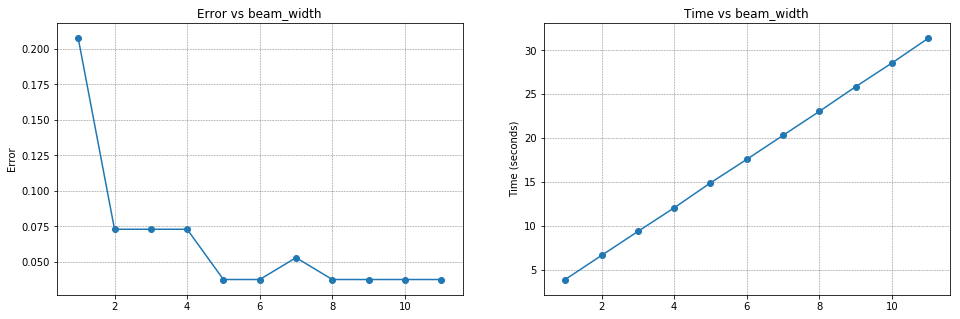

In [66]:
K = K[:len(errors)]

# Plot errors and times
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8*2, 5))

ax1.set_title("Error vs beam_width")
ax1.plot(K, errors)
ax1.scatter(K, errors)
ax1.set_ylabel('Error')
ax1.grid(color='gray', linestyle='--', linewidth=0.5)

ax2.set_title("Time vs beam_width")
ax2.plot(K, times)
ax2.scatter(K, times)
ax2.set_ylabel('Time (seconds)')
ax2.grid(color='gray', linestyle='--', linewidth=0.5)

plt.show()

### 3. (2.0) Bird classification. 

1. Direct prediction
   * Download the dataset birds from http://www-cvr.ai.uiuc.edu/ponce_grp/data/.
   * Use [Keras](https://keras.io/) and the [MobileNet](https://keras.io/applications/#mobilenet) pre-trained model, to classify the images in the birds dataset. Construct a confusion matrix that relates the bird classes with the 10 most frequent classes from ImageNet predicted by the model.
2. Transfer learning
   * Use the pre-trained MobileNet model as a feature extractor. Create a new model that replaces the top part of MobileNet with two layers of 256 and 6 neurons respectively.
   * Change the attribute trainable of the other layers to be False. This will prevent the weights of these layers to be changed during training.
   * Train the model with the training images from the bird dataset. 
   * Evaluate the performance over the test dataset reporting the results in a confusion matrix. Discuss the results. 
3. Fine tuning
   * Repeat the experiment from the last question, but this time allow all the layers to be trained. 
   * Compare and discuss the results.

In [117]:
from zipfile import ZipFile

# Get the data set
birds_path = get_file(os.path.abspath('./birds.zip'), 
                origin="http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds.zip")
zip_ref = ZipFile(birds_path, 'r')
zip_ref.extractall('./')
zip_ref.close()

# build data set
paths = np.array([])
y_true = np.array([])
for root, dirs, files in os.walk('./birds/'):
    for name in files:
        label = os.path.basename(root)
        path = os.path.join(root, name)
        paths = np.append(paths, path)
        y_true = np.append(y_true, label)

In [120]:
from PIL import Image #conda install pillow
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input, decode_predictions
from keras.applications.mobilenet import MobileNet

# Load the model
model = MobileNet()

# Classify the images
y_pred = np.array([])
for img_path in paths:
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    label_pred = decode_predictions(preds, top=1)[0][0][1]
    y_pred = np.append(y_pred, label_pred)

print("y_true shape", y_true.shape)
print("y_pred shape", y_pred.shape)

/home/juan/Programas/Miniconda3/envs/ml/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/juan/Programas/Miniconda3/envs/ml/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2652897280 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/home/juan/Programas/Miniconda3/envs/ml/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2656043008 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/home/juan/Programas/Miniconda3/envs/ml/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/h

y_true shape (600,)
y_pred shape (600,)


In [121]:
# Build confusion matrix
cm = pd.DataFrame(0, index=np.unique(y), columns=np.unique(y_pred))

for true, pred in zip(y_true, y_pred):
    cm.at[true, pred] += 1

df_sum = pd.DataFrame(data=cm.sum(numeric_only=True)).T
df_sum = df_sum.rename(index={0: 'SUM'})
cm = cm.append(df_sum)

cm = cm.sort_values(by=['SUM'], axis=1, ascending=False)

cm = cm.drop('SUM', axis=0)

cm.iloc[:, 0:10]

,drake,toucan,American_egret,ptarmigan,albatross,magpie,African_grey,great_grey_owl,king_penguin,meerkat
egret,0,0,91,0,0,0,0,0,0,0
mandarin,80,0,0,0,1,0,0,0,0,0
owl,0,0,0,27,4,0,18,14,0,7
puffin,12,20,0,1,16,18,0,0,8,0
toucan,0,97,0,0,0,0,0,0,0,0
wood_duck,97,0,0,0,0,1,0,0,0,0


----------------------

The assignment must be submitted as a [Jupyter notebook](http://jupyter.org/) through the following [Dropbox file request](https://www.dropbox.com/request/KqkTCJ1gENtNkNRaWomX), before midnight of the deadline date. The file must be named as ml-assign4-unalusername1-unalusername2.ipynb, where unalusername is the user name assigned by the university (include the usernames of all the members of the group). Check that the notebook executes properly and that the corresponding outputs render appropriately.  If there are several files, please put them in a zip file.